<!-- ![Alt Text](https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/header.png) -->

<div style="display: flex; justify-content: flex-start; align-items: center;">
   <a href="https://colab.research.google.com/github/msfasha/307304-Data-Mining/blob/main/20242/Part%201-Regression/1-2-multiple%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
    <a href="https://youtu.be/7ArmBVF2dCs?si=5ZBRqn9V9SXZaoPL&t=730" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="Multiple Linear Regression" style="height: 40px;margin-left:20px">
    </a>
    <a href="https://uopstdedu-my.sharepoint.com/:v:/g/personal/mohammed_fasha_uop_edu_jo/EcZsjT1cv7ZDkJMLJjw2N-oBr6RMalflCCvtarAbBCFBow?nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=bp3yeM" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/video_icon.png" alt="Recorded Video Lecture" style="height: 75px;margin-left:20px;">
    </a>
</div>

# Introduction To Multiple Linear Regression

### Topics and Outcomes
- Introduce Multiple Regression.

### What is multiple Linear Regression?
Multiple Linear Regression is an **extension** of simple linear regression that allows for predicting a dependent variable based on multiple independent variables. The general form of the model is expressed as:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n
$$

Where:
- $ y \in Y $ is the dependent variable (the value we aim to predict).
- $ \beta_0 $ is the intercept (constant term).
- $ \beta_1, \beta_2, \dots, \beta_n $ are the coefficients for the independent variables.
- $ X_1, X_2, \dots, X_n $ are the independent variables (features that influence $ y $).

The model gets the best regression fit line by finding the best values for $ \beta_0 $, $ \beta_1 $ and so on.

### Process Steps:
1. Import the required Libraries
2. Import the Dataset
3. Scrub the Dataset, correct any errors in the data, make need transformations
4. Split the Dataset into training and testing datasets
5. Select a Machine Learning algorithm and configure its parameters
6. Fit/Train the Model
7. Make Predictions
8. Evaluate the results and the accuracy of the model

## **Practical Example**
## **Predicting Apartment Price based on Appartment Features**

In this example, we’ll predict **price** of an apartment based on its area size, number of rooms, age of the building, floor number.<br>

#### **Step 1: Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#### **Step 2: Open Dataset**
We will use the house/apartment prices dataset to demonstrate multiple linear regression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/msfasha/307304-Data-Mining/refs/heads/main/datasets/apartment_prices.csv")
df

,Square_Area,Num_Rooms,Age_of_Building,Floor_Level,City,Price
0,162,1,15,12,Amman,74900.0
1,152,5,8,8,Aqaba,79720.0
2,74,3,2,8,Irbid,43200.0
3,166,1,3,18,Irbid,69800.0
4,131,3,14,15,Aqaba,63160.0
...,...,...,...,...,...,...
495,177,1,6,12,Irbid,64100.0
496,79,5,9,13,Irbid,52700.0
497,106,3,7,14,Aqaba,60160.0
498,108,3,9,18,Amman,72600.0


#### **Step 3: Define Features and Target**
We use **Square_Area**, **Num_Rooms**, **Age_of_Building** and **Floor_Level** as features and **Price** as the target.

In [3]:
# Features and Target
X = df[['Square_Area', 'Num_Rooms', 'Age_of_Building','Floor_Level']]  # Independent variables
y = df['Price']  # Dependent variable (Sales)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step 4: Train the Model**


In [4]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 364.36926791 5064.2938487  -925.54218137  951.56065025]
Intercept: 461.2702038561838


#### **Step 5: Make Predictions**

In [5]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Display the predictions alongside the actual values
df = pd.DataFrame({'Actual': np.round(y_test,2), 'Predicted': np.round(y_pred,2),'Residual': np.round(np.abs(y_test - y_pred),2)})
df

,Actual,Predicted,Residual
361,102550.0,89530.89,13019.11
73,54200.0,62947.21,8747.21
374,44000.0,44989.04,989.04
155,67000.0,77635.12,10635.12
104,63700.0,57098.21,6601.79
...,...,...,...
347,73360.0,75233.49,1873.49
86,36800.0,32110.44,4689.56
75,85500.0,75366.09,10133.91
438,89200.0,74516.43,14683.57


#### **Step 6: Evaluate the Model**
We evaluate the model using **MSE**, **MAE**, and **R-squared**.

In [6]:
# R-squared (R²)
print("R-squared (R²):", round(model.score(X_test,y_test),2))

R-squared (R²): 0.84


#### **Step 7: Plotting the Performance**

We visualize the predicted vs actual sales values to assess model performance.

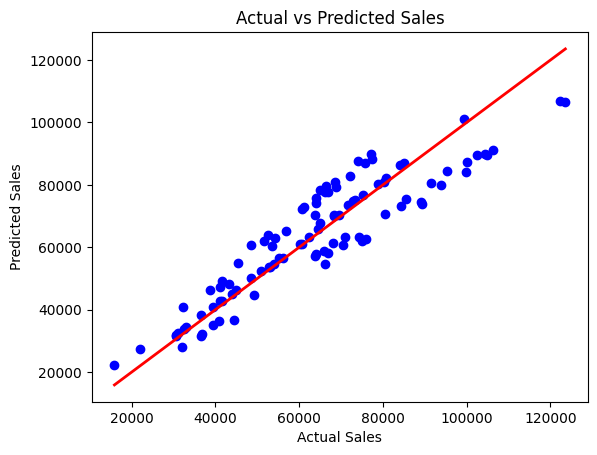

In [7]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect fit
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

### Comments on the Performance Plot
This plot is a scatter plot of **actual sales** values versus **predicted sales** values, with a red line representing the line of perfect fit (where actual equals predicted). Here are some thoughts based on the shape and distribution of the points:

1. **General Alignment with Perfect Fit**:
   - The data points generally align along the red line, indicating that the model is making reasonably accurate predictions.
   - Points closely clustered around the line suggest good model performance.

2. **Variance and Spread**:
   - <span style="color: red;">The spread of points widens slightly as sales values increase, indicating that the model may be slightly less accurate for higher sales values. This pattern can be common in regression models if there’s more variability in the data at higher ranges, potentially due to heteroscedasticity (non-constant variance of residuals).</span>

### Check the Variance Heteroscedasticity
To check for heteroscedasticity (non-constant variance of residuals) in our linear regression model, we can create a residual plot. In this plot, we plot the residuals (differences between actual and predicted values) against the predicted values. If the residuals show a random pattern with constant spread, it suggests homoscedasticity. However, if the spread of the residuals increases or decreases with the predicted values, it suggests heteroscedasticity.

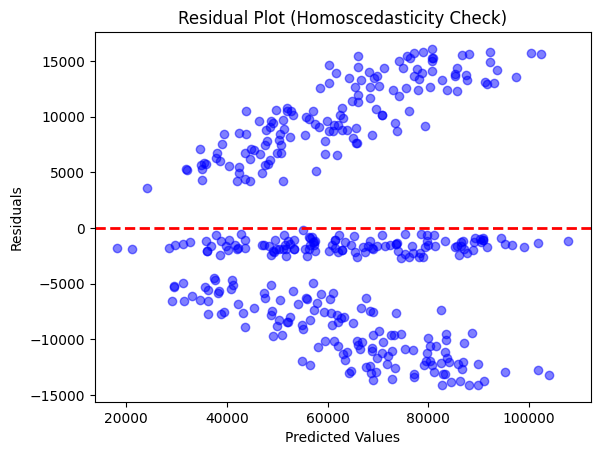

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the target variable for the training set
y_train_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals vs. predicted values
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Homoscedasticity Check)")
plt.show()

From the residual plot, it appears that there is a **fanning-out pattern** in the residuals, where the variance of the residuals increases as the predicted values increase. This pattern is indicative of **heteroscedasticity**.

In the next lesson, we will try to enhance the performance by introducing more features.

---

## Complete Model Code

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/msfasha/307304-Data-Mining/refs/heads/main/datasets/apartment_prices.csv')

# Features and Target
X = df[['Square_Area', 'Num_Rooms', 'Age_of_Building','Floor_Level']]  # Independent variables
y = df['Price']  # Dependent variable (Sales)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", round(model.score(X_test, y_test),2))  # Corrected

Coefficients: [ 364.36926791 5064.2938487  -925.54218137  951.56065025]
Intercept: 461.2702038561838
R^2 Score: 0.84
